In [1]:
import phoebe
import numpy as np
from phoebe import u
import matplotlib.pyplot as plt
%matplotlib notebook

# TODO: how to save?
import pickle

with open('test_binary.pickle', 'rb') as f:
    b = pickle.load(f)
    
from spectrum_nn import flux
import jax.numpy as jnp
import jax

from phoebe_utils import PhoebeConfig

<IPython.core.display.Javascript object>


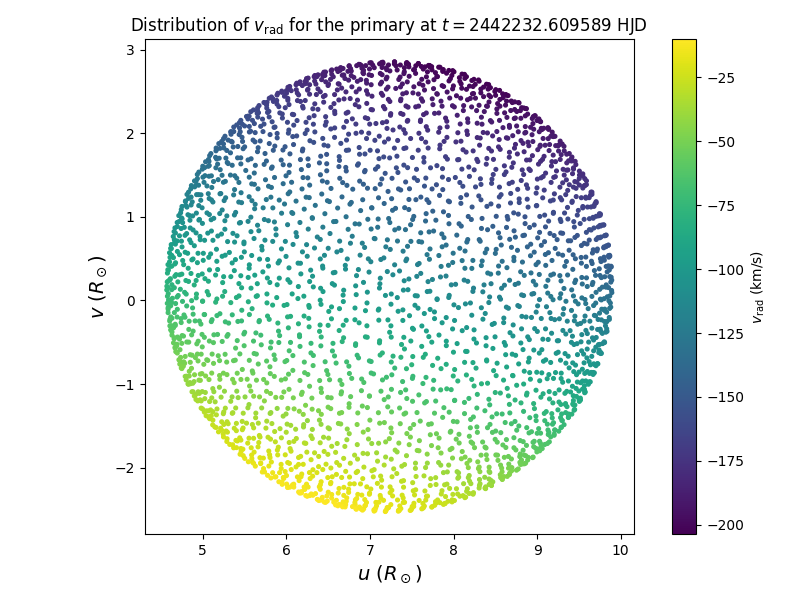

In [2]:
config = PhoebeConfig(b, 'bigmesh')
time = config.times[0]

coords = config.get_mesh_coordinates(time)
VW = config.get_radial_velocities(time)

#example plot of the radial velocities of centers of triangular surface elements for the primary component
#just to show/check that everything works fine and smoothly :)
plt.figure(figsize=(8,6))
plt.gca().set_aspect('equal')
plt.scatter(coords[:, 0], coords[:, 1], marker='o',c=VW,s=7)
plt.xlabel(r'$u$ ($R_\odot$)',fontsize=14)
plt.ylabel(r'$v$ ($R_\odot$)',fontsize=14)
plt.title(r'Distribution of $v_{\rm rad}$ for the primary at $t=$'+str(time)+' HJD',fontsize=12)
plt.colorbar(label=r'$v_{\rm rad}$ (km/s)')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


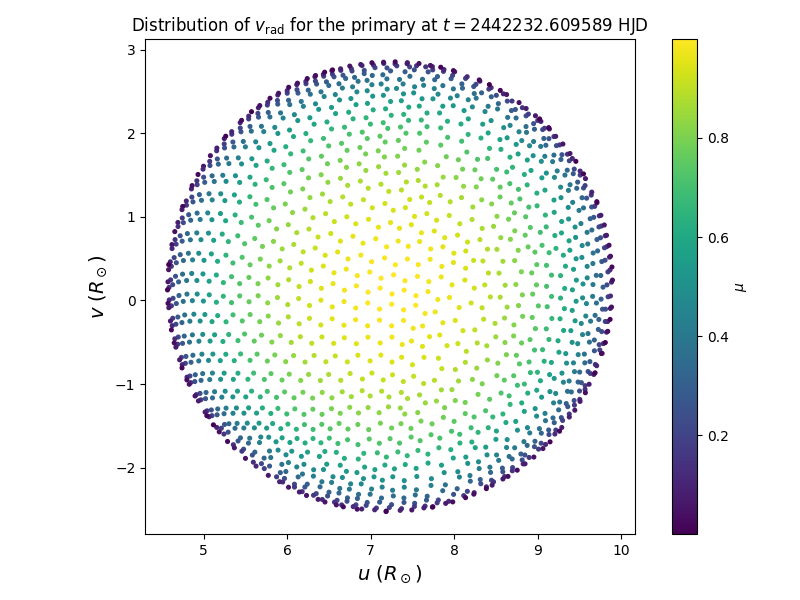

In [3]:
mus = config.get_mus(time)

pos_mus = np.argwhere(mus>0)

#example plot of the radial velocities of centers of triangular surface elements for the primary component
#just to show/check that everything works fine and smoothly :)
plt.figure(figsize=(8,6))
plt.gca().set_aspect('equal')
plt.scatter(coords[pos_mus, 0], coords[pos_mus, 1], marker='o',c=mus[pos_mus],s=7)
plt.xlabel(r'$u$ ($R_\odot$)',fontsize=14)
plt.ylabel(r'$v$ ($R_\odot$)',fontsize=14)
plt.title(r'Distribution of $v_{\rm rad}$ for the primary at $t=$'+str(time)+' HJD',fontsize=12)
plt.colorbar(label='$\mu$')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


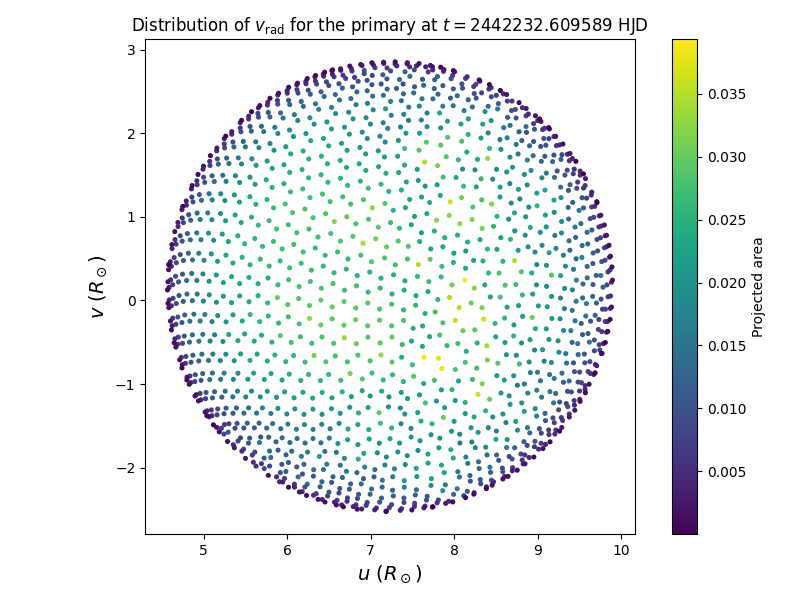

In [4]:
projected_areas = config.get_projected_areas(time)

pos_mus = np.argwhere(mus>0)

#example plot of the radial velocities of centers of triangular surface elements for the primary component
#just to show/check that everything works fine and smoothly :)
plt.figure(figsize=(8,6))
plt.gca().set_aspect('equal')
plt.scatter(coords[pos_mus, 0], coords[pos_mus, 1], marker='o',c=projected_areas[pos_mus],s=7)
plt.xlabel(r'$u$ ($R_\odot$)',fontsize=14)
plt.ylabel(r'$v$ ($R_\odot$)',fontsize=14)
plt.title(r'Distribution of $v_{\rm rad}$ for the primary at $t=$'+str(time)+' HJD',fontsize=12)
plt.colorbar(label='Projected area')
plt.tight_layout()
plt.show()

In [5]:
np.sum(projected_areas[pos_mus])

22.516406337581266

In [6]:
mus = jnp.array(mus[pos_mus])
areas = jnp.array(projected_areas[pos_mus])

In [7]:
atmosphere_flux = jax.jit(jax.vmap(flux, in_axes=(None, 0)))

In [8]:
atmosphere = jnp.sum(jnp.multiply(areas.reshape((-1, 1, 1)), atmosphere_flux(jnp.linspace(0, 1, 100000),
                                                                             jnp.ones_like(mus).flatten())), axis=0)/jnp.sum(areas)

In [9]:
atmosphere.shape

(100000, 2)

In [10]:
nn_flux, nn_continuum = atmosphere[:, 0], atmosphere[:, 1]

In [11]:
test_atmo = flux(jnp.linspace(0, 1, 100000), 1.)

In [12]:
test_flux, test_continuum = test_atmo[:, 0], test_atmo[:, 1]

<IPython.core.display.Javascript object>


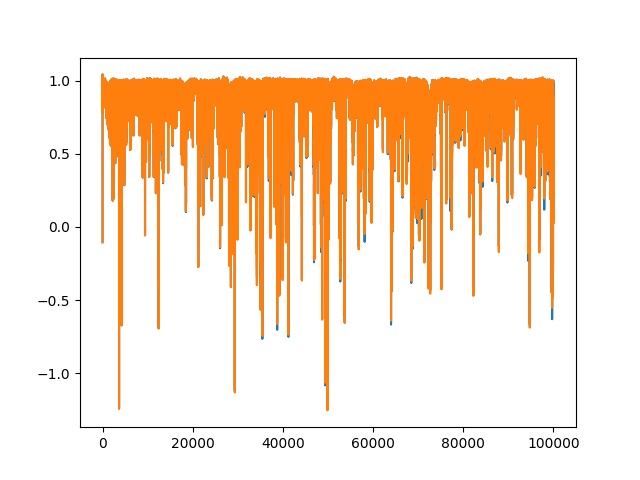

In [13]:
plt.figure()
plt.plot(nn_flux);
plt.plot(test_flux);